In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use('cyberpunk')

<h1 style="text-align:center;font-weight:bold;">IMPORTING RENNER DATA</h1>

In [2]:
df_renner = pd.read_excel('./data/lojas_renner.xlsx','Lista de Lojas | Stores List',skiprows=5,usecols=['Business','Country','UF','State','City','Opening date','Shopping Mall / Street'])
df_renner

,Business,Opening date,Country,UF,State,City,Shopping Mall / Street
0,Renner,2023-12-21 00:00:00,Uruguay,UY,Uruguay,Maldonado,Shopping Mall
1,Youcom,2023-11-30 00:00:00,Brazil,BA,Bahia,Salvador,Shopping Mall
2,Renner,2023-11-30 00:00:00,Brazil,ES,Espírito Santo,Aracruz,Shopping Mall
3,Youcom,2023-11-30 00:00:00,Brazil,BA,Bahia,Lauro de Freitas,Shopping Mall
4,Youcom,2023-11-23 00:00:00,Brazil,SP,São Paulo,São Paulo,Shopping Mall
...,...,...,...,...,...,...,...
775,Rio de Janeiro,41,4,57,NaN,NaN,NaN
776,São Paulo,119,48,209,NaN,NaN,NaN
777,Uruguay,11,0,11,NaN,NaN,NaN
778,Argentina,4,0,4,NaN,NaN,NaN


<h1 style="text-align:center;font-weight:bold;">CLEANING RENNER DATA</h1>

In [3]:
df_renner = df_renner.dropna()
df_renner = df_renner.query('Business == "Renner" and Country == "Brazil"')
df_renner

,Business,Opening date,Country,UF,State,City,Shopping Mall / Street
2,Renner,2023-11-30 00:00:00,Brazil,ES,Espírito Santo,Aracruz,Shopping Mall
8,Renner,2023-11-09 00:00:00,Brazil,SP,São Paulo,São Paulo,Shopping Mall
10,Renner,2023-10-27 00:00:00,Brazil,RS,Rio Grande do Sul,Montenegro,Street
11,Renner,2023-10-17 00:00:00,Brazil,MG,Minas Gerais,Ituiutaba,Shopping Mall
12,Renner,2023-10-11 00:00:00,Brazil,SC,Santa Catarina,Videira,Shopping Mall
...,...,...,...,...,...,...,...
735,Renner,1980-09-01 00:00:00,Brazil,RS,Rio Grande do Sul,Santa Maria,Street
736,Renner,1977-11-01 00:00:00,Brazil,RS,Rio Grande do Sul,Porto Alegre,Street
737,Renner,1976-04-10 00:00:00,Brazil,RS,Rio Grande do Sul,Canoas,Shopping Mall
738,Renner,1970-12-04 00:00:00,Brazil,RS,Rio Grande do Sul,Porto Alegre,Shopping Mall


In [4]:
df_renner['Opening date'] = pd.to_datetime(df_renner['Opening date']).dt.date
df_renner

,Business,Opening date,Country,UF,State,City,Shopping Mall / Street
2,Renner,2023-11-30,Brazil,ES,Espírito Santo,Aracruz,Shopping Mall
8,Renner,2023-11-09,Brazil,SP,São Paulo,São Paulo,Shopping Mall
10,Renner,2023-10-27,Brazil,RS,Rio Grande do Sul,Montenegro,Street
11,Renner,2023-10-17,Brazil,MG,Minas Gerais,Ituiutaba,Shopping Mall
12,Renner,2023-10-11,Brazil,SC,Santa Catarina,Videira,Shopping Mall
...,...,...,...,...,...,...,...
735,Renner,1980-09-01,Brazil,RS,Rio Grande do Sul,Santa Maria,Street
736,Renner,1977-11-01,Brazil,RS,Rio Grande do Sul,Porto Alegre,Street
737,Renner,1976-04-10,Brazil,RS,Rio Grande do Sul,Canoas,Shopping Mall
738,Renner,1970-12-04,Brazil,RS,Rio Grande do Sul,Porto Alegre,Shopping Mall


<h1 style="text-align:center;font-weight:bold;">IMPORTING CITIES DATA</h1>

In [5]:
df_pib_cities = pd.read_excel('./data/pib_municipios.xlsx')
df_pop_cities = pd.read_excel('./data/populacao_municipios.xlsx')

In [6]:
df_pib_cities

,City,pib
0,Alta Floresta D'Oeste (RO),734469
1,Ariquemes (RO),3209761
2,Cabixi (RO),238412
3,Cacoal (RO),2792383
4,Cerejeiras (RO),743037
...,...,...
5565,Vianópolis (GO),857968
5566,Vicentinópolis (GO),480173
5567,Vila Boa (GO),179899
5568,Vila Propício (GO),308013


In [7]:
df_pop_cities

,City,pop
0,Alta Floresta D'Oeste (RO),21494
1,Ariquemes (RO),96833
2,Cabixi (RO),5351
3,Cacoal (RO),86887
4,Cerejeiras (RO),15890
...,...,...
5565,Vianópolis (GO),14956
5566,Vicentinópolis (GO),8768
5567,Vila Boa (GO),4215
5568,Vila Propício (GO),5815


<h1 style="text-align:center;font-weight:bold;">MERGE CITIES DATA</h1>

In [8]:
df_cities = df_pib_cities.merge(df_pop_cities,on='City')
df_cities

,City,pib,pop
0,Alta Floresta D'Oeste (RO),734469,21494
1,Ariquemes (RO),3209761,96833
2,Cabixi (RO),238412,5351
3,Cacoal (RO),2792383,86887
4,Cerejeiras (RO),743037,15890
...,...,...,...
5565,Vianópolis (GO),857968,14956
5566,Vicentinópolis (GO),480173,8768
5567,Vila Boa (GO),179899,4215
5568,Vila Propício (GO),308013,5815


<h1 style="text-align:center;font-weight:bold;">CLEANING MERGED CITIES DATA</h1>

In [9]:
df_cities['pib_per_capta'] = df_cities['pib'] / df_cities['pop']
df_cities

,City,pib,pop,pib_per_capta
0,Alta Floresta D'Oeste (RO),734469,21494,34.170885
1,Ariquemes (RO),3209761,96833,33.147388
2,Cabixi (RO),238412,5351,44.554663
3,Cacoal (RO),2792383,86887,32.138099
4,Cerejeiras (RO),743037,15890,46.761296
...,...,...,...,...
5565,Vianópolis (GO),857968,14956,57.366141
5566,Vicentinópolis (GO),480173,8768,54.764256
5567,Vila Boa (GO),179899,4215,42.680664
5568,Vila Propício (GO),308013,5815,52.968702


In [10]:
df_cities[['City','UF']] = df_cities['City'].str.split('(',expand=True)
df_cities

,City,pib,pop,pib_per_capta,UF
0,Alta Floresta D'Oeste,734469,21494,34.170885,RO)
1,Ariquemes,3209761,96833,33.147388,RO)
2,Cabixi,238412,5351,44.554663,RO)
3,Cacoal,2792383,86887,32.138099,RO)
4,Cerejeiras,743037,15890,46.761296,RO)
...,...,...,...,...,...
5565,Vianópolis,857968,14956,57.366141,GO)
5566,Vicentinópolis,480173,8768,54.764256,GO)
5567,Vila Boa,179899,4215,42.680664,GO)
5568,Vila Propício,308013,5815,52.968702,GO)


In [11]:
df_cities['UF'] = df_cities['UF'].str.replace(')','')
df_cities

,City,pib,pop,pib_per_capta,UF
0,Alta Floresta D'Oeste,734469,21494,34.170885,RO
1,Ariquemes,3209761,96833,33.147388,RO
2,Cabixi,238412,5351,44.554663,RO
3,Cacoal,2792383,86887,32.138099,RO
4,Cerejeiras,743037,15890,46.761296,RO
...,...,...,...,...,...
5565,Vianópolis,857968,14956,57.366141,GO
5566,Vicentinópolis,480173,8768,54.764256,GO
5567,Vila Boa,179899,4215,42.680664,GO
5568,Vila Propício,308013,5815,52.968702,GO


<h1 style="text-align:center;font-weight:bold;">MERGE RENNER WITH CITIES DATA</h1>

In [12]:
df_cities['City'] = df_cities['City'].str.strip()
df_cities['UF'] = df_cities['UF'].str.strip()
df_renner['City'] = df_renner['City'].str.strip()
df_renner['UF'] = df_renner['UF'].str.strip()

In [13]:
df_renner_economy = df_cities.merge(df_renner,on=['City','UF'])
df_renner_economy

,City,pib,pop,pib_per_capta,UF,Business,Opening date,Country,State,Shopping Mall / Street
0,Cacoal,2792383,86887,32.138099,RO,Renner,2021-04-05,Brazil,Rondônia,Shopping Mall
1,Porto Velho,20059522,460434,43.566552,RO,Renner,2008-10-30,Brazil,Rondônia,Shopping Mall
2,Rio Branco,10955675,364756,30.035627,AC,Renner,2011-11-08,Brazil,Acre,Shopping Mall
3,Manaus,103281436,2063689,50.046996,AM,Renner,2014-12-11,Brazil,Amazonas,Street
4,Manaus,103281436,2063689,50.046996,AM,Renner,2014-11-28,Brazil,Amazonas,Shopping Mall
...,...,...,...,...,...,...,...,...,...,...
422,Brasília,286943782,2817381,101.847703,DF,Renner,2009-06-25,Brazil,Distrito Federal,Shopping Mall
423,Brasília,286943782,2817381,101.847703,DF,Renner,2007-10-23,Brazil,Distrito Federal,Shopping Mall
424,Brasília,286943782,2817381,101.847703,DF,Renner,2001-05-08,Brazil,Distrito Federal,Shopping Mall
425,Brasília,286943782,2817381,101.847703,DF,Renner,2000-11-16,Brazil,Distrito Federal,Shopping Mall


<h1 style="text-align:center;font-weight:bold;">ANALYSIS RENNER/CITIES DATA</h1>

In [14]:
df_renner_economy['Shopping Mall / Street'].value_counts(normalize=True)

Shopping Mall / Street
Shopping Mall    0.875878
Street           0.124122
Name: proportion, dtype: float64

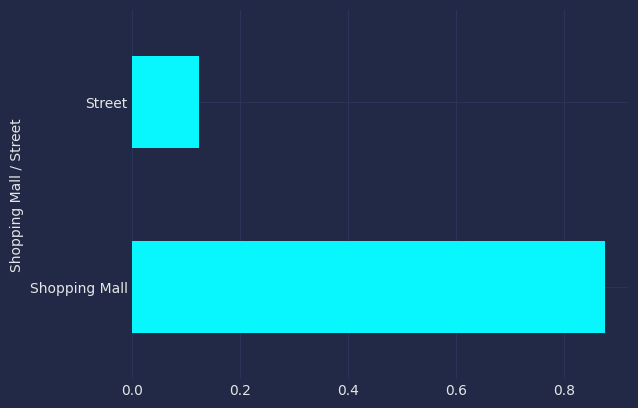

In [15]:
df_renner_economy['Shopping Mall / Street'].value_counts(normalize=True).plot(kind='barh')
plt.show()

In [16]:
df_renner_economy.sort_values('pop',ascending=False)[['State','City','pop']]

,State,City,pop
250,São Paulo,São Paulo,11451999
278,São Paulo,São Paulo,11451999
252,São Paulo,São Paulo,11451999
253,São Paulo,São Paulo,11451999
254,São Paulo,São Paulo,11451999
...,...,...,...
388,Rio Grande do Sul,Taquara,53242
340,Rio Grande do Sul,Canela,48946
389,Rio Grande do Sul,Torres,41751
354,Rio Grande do Sul,Gramado,40134


In [17]:
df_renner_economy['pop'].describe().apply(round)

count         427
mean      2010221
std       3294045
min         34335
25%        241252
50%        537211
75%       1773718
max      11451999
Name: pop, dtype: int64

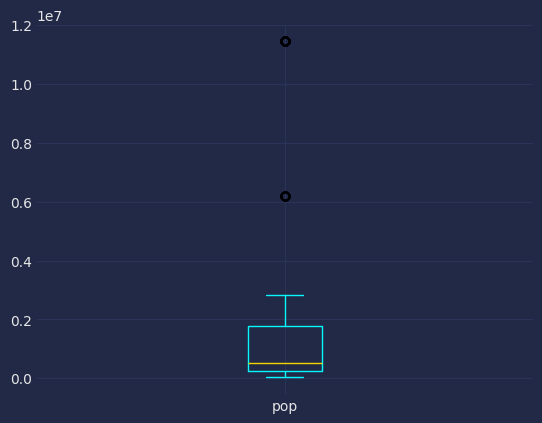

In [18]:
df_renner_economy['pop'].plot(kind='box')
plt.show()

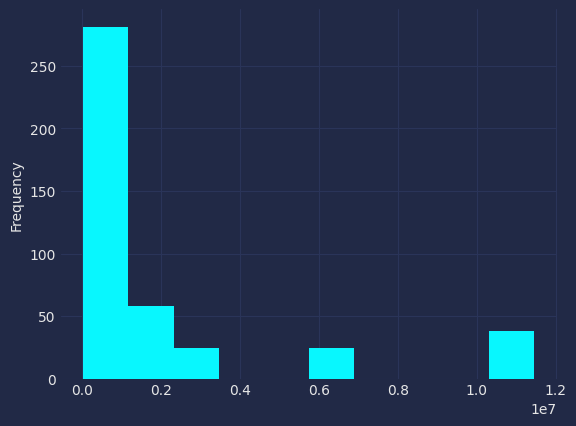

In [19]:
df_renner_economy['pop'].plot(kind='hist')
plt.show()

In [20]:
df_renner_economy.sort_values('pib_per_capta',ascending=False)[['State','City','pib_per_capta']]

,State,City,pib_per_capta
132,Rio de Janeiro,Maricá,434.993922
181,São Paulo,Cajamar,245.046985
18,Pará,Parauapebas,185.796682
175,São Paulo,Barueri,183.357402
176,São Paulo,Barueri,183.357402
...,...,...,...
189,São Paulo,Carapicuíba,17.713151
55,Pernambuco,Olinda,16.538991
56,Pernambuco,Paulista,16.341880
52,Pernambuco,Camaragibe,15.088752


In [21]:
df_renner_economy['pib_per_capta'].describe().apply(round)

count    427
mean      56
std       33
min       15
25%       36
50%       53
75%       66
max      435
Name: pib_per_capta, dtype: int64

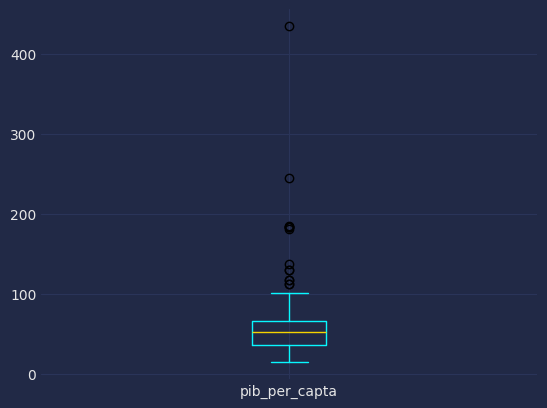

In [22]:
df_renner_economy['pib_per_capta'].plot(kind='box')
plt.show()

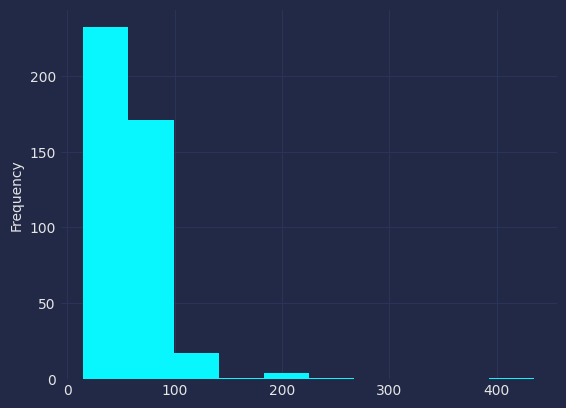

In [23]:
df_renner_economy['pib_per_capta'].plot(kind='hist')
plt.show()

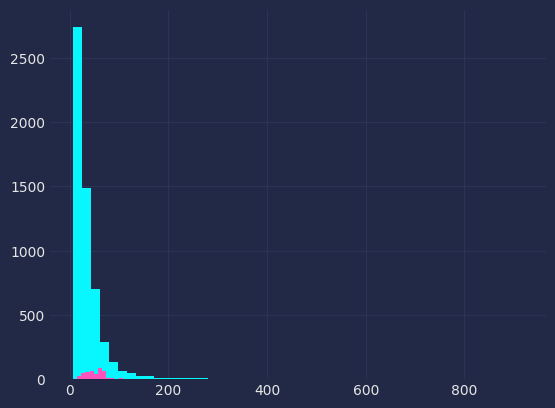

In [24]:
fig,ax=plt.subplots()
ax.hist(df_cities['pib_per_capta'],bins=50)
ax.hist(df_renner_economy['pib_per_capta'],bins=50)
plt.show()

<h1 style="text-align:center;font-weight:bold;">IMPORTING SHOPPINGS DATA</h1>

In [25]:
df_shoppings = pd.read_csv('./data/shoppings.csv')
df_shoppings['City'] = df_shoppings['City'].str.upper().str.strip()
df_shoppings

,Shopping,Area por m2,City,State
0,ÁGUAS CLARAS SHOPPING,12626,BRASÍLIA,DF
1,ÁGUAS LINDAS SHOPPING,67788,ÁGUAS LINDAS DE GOIÁS,GO
2,ALAMEDA JUIZ DE FORA,12437,JUIZ DE FORA,MG
3,ALAMEDA SHOPPING,4807,BRASÍLIA,DF
4,ALPHA SQUARE MALL,0,BARUERI,SP
...,...,...,...,...
624,VILLAGIO MALL CENTER,5943,BAURU,SP
625,ASSIS PLAZA SHOPPING,1991,ASSIS,SP
626,MEGA MODA PARK,9920,GOIÂNIA,GO
627,RIVIERA SHOPPING,37393,BERTIOGA,SP


In [26]:
shoppings_per_city = df_shoppings['City'].value_counts().sort_values().to_frame()
shoppings_per_city.columns = ['Number of shoppings']
shoppings_per_city

,Number of shoppings
City,
ARAXÁ,1
OLINDA,1
ALTAMIRA,1
ITABAIANA,1
PIRACICABA,1
...,...
BELO HORIZONTE,16
GOIÂNIA,19
BRASÍLIA,22


In [27]:
df_renner_shoppings = df_renner_economy[df_renner_economy['Shopping Mall / Street'] == 'Shopping Mall']
df_renner_shoppings['City'] = df_renner_shoppings['City'].str.upper()
df_renner_shoppings

/tmp/ipykernel_29452/2924528959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_renner_shoppings['City'] = df_renner_shoppings['City'].str.upper()


,City,pib,pop,pib_per_capta,UF,Business,Opening date,Country,State,Shopping Mall / Street
0,CACOAL,2792383,86887,32.138099,RO,Renner,2021-04-05,Brazil,Rondônia,Shopping Mall
1,PORTO VELHO,20059522,460434,43.566552,RO,Renner,2008-10-30,Brazil,Rondônia,Shopping Mall
2,RIO BRANCO,10955675,364756,30.035627,AC,Renner,2011-11-08,Brazil,Acre,Shopping Mall
4,MANAUS,103281436,2063689,50.046996,AM,Renner,2014-11-28,Brazil,Amazonas,Shopping Mall
5,MANAUS,103281436,2063689,50.046996,AM,Renner,2014-11-27,Brazil,Amazonas,Shopping Mall
...,...,...,...,...,...,...,...,...,...,...
422,BRASÍLIA,286943782,2817381,101.847703,DF,Renner,2009-06-25,Brazil,Distrito Federal,Shopping Mall
423,BRASÍLIA,286943782,2817381,101.847703,DF,Renner,2007-10-23,Brazil,Distrito Federal,Shopping Mall
424,BRASÍLIA,286943782,2817381,101.847703,DF,Renner,2001-05-08,Brazil,Distrito Federal,Shopping Mall
425,BRASÍLIA,286943782,2817381,101.847703,DF,Renner,2000-11-16,Brazil,Distrito Federal,Shopping Mall


In [28]:
renner_shoppings_per_city = df_renner_shoppings['City'].value_counts().sort_values().to_frame()
renner_shoppings_per_city.columns = ['Number of stores']
renner_shoppings_per_city

,Number of stores
City,
NOVO HAMBURGO,1
IPATINGA,1
ARAPIRACA,1
ITUIUTABA,1
MONTES CLAROS,1
...,...
PORTO ALEGRE,10
BELO HORIZONTE,10
BRASÍLIA,10


In [29]:
df_stores_shoppings = renner_shoppings_per_city.join(shoppings_per_city,how='outer')
df_stores_shoppings = df_stores_shoppings.fillna(0)
df_stores_shoppings

,Number of stores,Number of shoppings
City,,
ALEXÂNIA,0.0,1.0
ALTAMIRA,0.0,1.0
ANANINDEUA,1.0,1.0
ANDRADINA,0.0,1.0
ANGRA DOS REIS,1.0,1.0
...,...,...
VITÓRIA DA CONQUISTA,2.0,2.0
VOLTA REDONDA,2.0,2.0
VÁRZEA GRANDE,1.0,1.0


<h1 style="text-align:center;font-weight:bold;">ANALYZING SHOPPINGS DATA</h1>

In [30]:
df_stores_shoppings['New Opens'] = df_stores_shoppings['Number of shoppings'] - df_stores_shoppings['Number of stores']
df_stores_shoppings

,Number of stores,Number of shoppings,New Opens
City,,,
ALEXÂNIA,0.0,1.0,1.0
ALTAMIRA,0.0,1.0,1.0
ANANINDEUA,1.0,1.0,0.0
ANDRADINA,0.0,1.0,1.0
ANGRA DOS REIS,1.0,1.0,0.0
...,...,...,...
VITÓRIA DA CONQUISTA,2.0,2.0,0.0
VOLTA REDONDA,2.0,2.0,0.0
VÁRZEA GRANDE,1.0,1.0,0.0


In [31]:
df_stores_shoppings.sort_values('New Opens')

,Number of stores,Number of shoppings,New Opens
City,,,
TANGARÁ DA SERRA,1.0,0.0,-1.0
CACOAL,1.0,0.0,-1.0
SORRISO,1.0,0.0,-1.0
PARANAVAÍ,1.0,0.0,-1.0
TORRES,1.0,0.0,-1.0
...,...,...,...
CURITIBA,7.0,15.0,8.0
BRASÍLIA,10.0,22.0,12.0
GOIÂNIA,6.0,19.0,13.0


In [32]:
df_stores_shoppings = df_stores_shoppings[df_stores_shoppings['New Opens'] > -1]

In [33]:
df_stores_shoppings['New Opens'].sum()

264.0

<h1 style="text-align:center;font-weight:bold;">ANALYZING STORES DATA</h1>

In [34]:
total_stores = df_renner_economy['Shopping Mall / Street'].value_counts()
total_stores

Shopping Mall / Street
Shopping Mall    374
Street            53
Name: count, dtype: int64

In [35]:
total_stores['Shopping Mall'] = total_stores['Shopping Mall'] + df_stores_shoppings['New Opens'].sum()

In [36]:
total_stores

Shopping Mall / Street
Shopping Mall    638
Street            53
Name: count, dtype: int64

In [37]:
total_stores_percentage = df_renner_economy['Shopping Mall / Street'].value_counts(normalize=True)
street_stores_and_shoppings = total_stores['Shopping Mall'] / total_stores_percentage['Shopping Mall']
street_stores_and_shoppings

728.4117647058823

In [38]:
street_opens = street_stores_and_shoppings - total_stores['Shopping Mall'] - total_stores['Street']
street_opens

37.41176470588232